In [21]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

In [22]:
df = pd.read_excel('data.xlsx')
df.head()

,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12,Variable_13,Variable_14,Target
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [23]:
# Assuming `df` is your DataFrame and the target variable is named "target"
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Initialize the neural network
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

# Output layer for binary classification (using sigmoid activation)
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5938 - loss: 0.6559 - val_accuracy: 0.7826 - val_loss: 0.5846
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6904 - loss: 0.6107 - val_accuracy: 0.8188 - val_loss: 0.5280
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7411 - loss: 0.5446 - val_accuracy: 0.8261 - val_loss: 0.4643
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7872 - loss: 0.4645 - val_accuracy: 0.8623 - val_loss: 0.4105
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7997 - loss: 0.4792 - val_accuracy: 0.8768 - val_loss: 0.3740
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8303 - loss: 0.4209 - val_accuracy: 0.8913 - val_loss: 0.3571
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8439 - loss: 0.3703 - val_accuracy: 0.8841 - val_loss: 0.3430
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8449 - loss: 0.3855 - val_accuracy: 0.8913 - val_loss

In [27]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Test Accuracy: 0.8623188405797102
Confusion Matrix:
[[79  8]
 [11 40]]


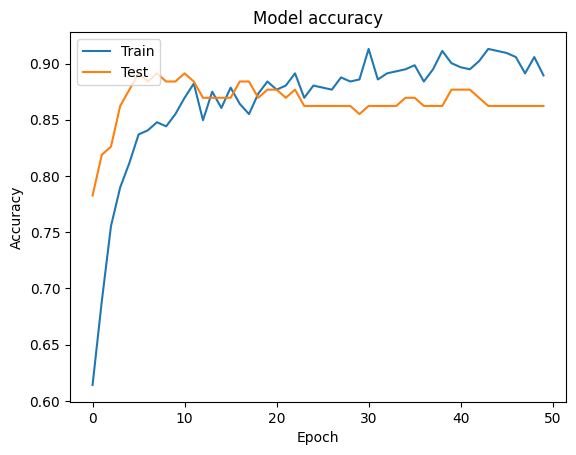

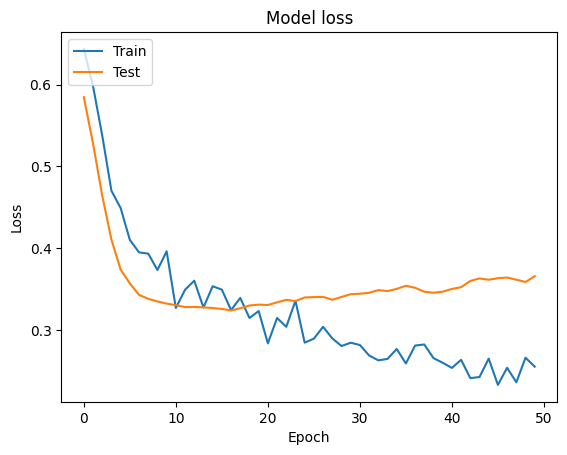

In [28]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Combination of 10 Variables

In [29]:
# Assuming `df` is your DataFrame and the target variable is named "Target"
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable

# List of independent variable names
variables = X.columns.tolist()

# Generate all combinations of 10 variables out of 14
combinations_of_variables = [('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5',
                              'Variable_8', 'Variable_10', 'Variable_11', 'Variable_12', 'Variable_13')]


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert X_train and X_test back to DataFrames to select subsets by column names
X_train_df = pd.DataFrame(X_train, columns=variables)
X_test_df = pd.DataFrame(X_test, columns=variables)

# Initialize variables to store the best accuracy and corresponding variable set
best_accuracy = 0
best_variable_set = None

# Iterate over all combinations of 10 variables
for variable_combination in combinations_of_variables:
    # Select subset of variables
    X_train_subset = X_train_df[list(variable_combination)]
    X_test_subset = X_test_df[list(variable_combination)]

    # Build a new neural network model
    model = Sequential([
        Dense(64, input_shape=(X_train_subset.shape[1],), activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_subset, y_train, epochs=50, batch_size=32, verbose=0)

    # Predict on the test set
    y_pred = (model.predict(X_test_subset) > 0.5).astype("int32")

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Variables: {variable_combination}, Accuracy: {accuracy:.2f}%")

    # Update best accuracy and variable set if current one is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_variable_set = variable_combination

# Output the best set of variables and the corresponding accuracy
print("Best set of variables:", best_variable_set)
print("Best accuracy:", best_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_8', 'Variable_10', 'Variable_11', 'Variable_12', 'Variable_13'), Accuracy: 86.96%
Best set of variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_8', 'Variable_10', 'Variable_11', 'Variable_12', 'Variable_13')
Best accuracy: 86.95652173913044


# Combination of 9 Variables

In [30]:
# Assuming `df` is your DataFrame and the target variable is named "Target"
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable

# List of independent variable names
variables = X.columns.tolist()

# Generate all combinations of 10 variables out of 14
combinations_of_variables = [('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_8', 'Variable_9', 'Variable_10', 'Variable_13')]


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert X_train and X_test back to DataFrames to select subsets by column names
X_train_df = pd.DataFrame(X_train, columns=variables)
X_test_df = pd.DataFrame(X_test, columns=variables)

# Initialize variables to store the best accuracy and corresponding variable set
best_accuracy = 0
best_variable_set = None

# Iterate over all combinations of 10 variables
for variable_combination in combinations_of_variables:
    # Select subset of variables
    X_train_subset = X_train_df[list(variable_combination)]
    X_test_subset = X_test_df[list(variable_combination)]

    # Build a new neural network model
    model = Sequential([
        Dense(64, input_shape=(X_train_subset.shape[1],), activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_subset, y_train, epochs=50, batch_size=32, verbose=0)

    # Predict on the test set
    y_pred = (model.predict(X_test_subset) > 0.5).astype("int32")

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Variables: {variable_combination}, Accuracy: {accuracy:.2f}%")

    # Update best accuracy and variable set if current one is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_variable_set = variable_combination

# Output the best set of variables and the corresponding accuracy
print("Best set of variables:", best_variable_set)
print("Best accuracy:", best_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_8', 'Variable_9', 'Variable_10', 'Variable_13'), Accuracy: 85.51%
Best set of variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_8', 'Variable_9', 'Variable_10', 'Variable_13')
Best accuracy: 85.5072463768116


# Combination of 8 Variables

In [17]:
# Assuming `df` is your DataFrame and the target variable is named "Target"
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable

# List of independent variable names
variables = X.columns.tolist()

# Generate all combinations of 10 variables out of 14
combinations_of_variables = [('Variable_1', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9', 'Variable_12')]


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert X_train and X_test back to DataFrames to select subsets by column names
X_train_df = pd.DataFrame(X_train, columns=variables)
X_test_df = pd.DataFrame(X_test, columns=variables)

# Initialize variables to store the best accuracy and corresponding variable set
best_accuracy = 0
best_variable_set = None

# Iterate over all combinations of 10 variables
for variable_combination in combinations_of_variables:
    # Select subset of variables
    X_train_subset = X_train_df[list(variable_combination)]
    X_test_subset = X_test_df[list(variable_combination)]

    # Build a new neural network model
    model = Sequential([
        Dense(64, input_shape=(X_train_subset.shape[1],), activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_subset, y_train, epochs=50, batch_size=32, verbose=0)

    # Predict on the test set
    y_pred = (model.predict(X_test_subset) > 0.5).astype("int32")

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Variables: {variable_combination}, Accuracy: {accuracy:.2f}%")

    # Update best accuracy and variable set if current one is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_variable_set = variable_combination

# Output the best set of variables and the corresponding accuracy
print("Best set of variables:", best_variable_set)
print("Best accuracy:", best_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Variables: ('Variable_1', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9', 'Variable_12'), Accuracy: 86.96%
Best set of variables: ('Variable_1', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9', 'Variable_12')
Best accuracy: 86.95652173913044


# Combination of 7 Variables

In [18]:
# Assuming `df` is your DataFrame and the target variable is named "Target"
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable

# List of independent variable names
variables = X.columns.tolist()

# Generate all combinations of 10 variables out of 14
combinations_of_variables = [('Variable_2', 'Variable_3', 'Variable_5', 'Variable_8', 'Variable_10', 'Variable_13', 'Variable_14')]


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert X_train and X_test back to DataFrames to select subsets by column names
X_train_df = pd.DataFrame(X_train, columns=variables)
X_test_df = pd.DataFrame(X_test, columns=variables)

# Initialize variables to store the best accuracy and corresponding variable set
best_accuracy = 0
best_variable_set = None

# Iterate over all combinations of 10 variables
for variable_combination in combinations_of_variables:
    # Select subset of variables
    X_train_subset = X_train_df[list(variable_combination)]
    X_test_subset = X_test_df[list(variable_combination)]

    # Build a new neural network model
    model = Sequential([
        Dense(64, input_shape=(X_train_subset.shape[1],), activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_subset, y_train, epochs=50, batch_size=32, verbose=0)

    # Predict on the test set
    y_pred = (model.predict(X_test_subset) > 0.5).astype("int32")

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Variables: {variable_combination}, Accuracy: {accuracy:.2f}%")

    # Update best accuracy and variable set if current one is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_variable_set = variable_combination

# Output the best set of variables and the corresponding accuracy
print("Best set of variables:", best_variable_set)
print("Best accuracy:", best_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Variables: ('Variable_2', 'Variable_3', 'Variable_5', 'Variable_8', 'Variable_10', 'Variable_13', 'Variable_14'), Accuracy: 85.51%
Best set of variables: ('Variable_2', 'Variable_3', 'Variable_5', 'Variable_8', 'Variable_10', 'Variable_13', 'Variable_14')
Best accuracy: 85.5072463768116


# Combination of 6 Variables

In [19]:
# Assuming `df` is your DataFrame and the target variable is named "Target"
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable

# List of independent variable names
variables = X.columns.tolist()

# Generate all combinations of 10 variables out of 14
combinations_of_variables = [('Variable_1', 'Variable_4', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9')]


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert X_train and X_test back to DataFrames to select subsets by column names
X_train_df = pd.DataFrame(X_train, columns=variables)
X_test_df = pd.DataFrame(X_test, columns=variables)

# Initialize variables to store the best accuracy and corresponding variable set
best_accuracy = 0
best_variable_set = None

# Iterate over all combinations of 10 variables
for variable_combination in combinations_of_variables:
    # Select subset of variables
    X_train_subset = X_train_df[list(variable_combination)]
    X_test_subset = X_test_df[list(variable_combination)]

    # Build a new neural network model
    model = Sequential([
        Dense(64, input_shape=(X_train_subset.shape[1],), activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_subset, y_train, epochs=50, batch_size=32, verbose=0)

    # Predict on the test set
    y_pred = (model.predict(X_test_subset) > 0.5).astype("int32")

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Variables: {variable_combination}, Accuracy: {accuracy:.2f}%")

    # Update best accuracy and variable set if current one is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_variable_set = variable_combination

# Output the best set of variables and the corresponding accuracy
print("Best set of variables:", best_variable_set)
print("Best accuracy:", best_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Variables: ('Variable_1', 'Variable_4', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9'), Accuracy: 85.51%
Best set of variables: ('Variable_1', 'Variable_4', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9')
Best accuracy: 85.5072463768116


# Combination of 5 Variables

In [20]:
# Assuming `df` is your DataFrame and the target variable is named "Target"
X = df.drop('Target', axis=1)  # Features
y = df['Target']  # Target variable

# List of independent variable names
variables = X.columns.tolist()

# Generate all combinations of 10 variables out of 14
combinations_of_variables = [('Variable_4', 'Variable_5', 'Variable_7', 'Variable_8', 'Variable_9')]


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert X_train and X_test back to DataFrames to select subsets by column names
X_train_df = pd.DataFrame(X_train, columns=variables)
X_test_df = pd.DataFrame(X_test, columns=variables)

# Initialize variables to store the best accuracy and corresponding variable set
best_accuracy = 0
best_variable_set = None

# Iterate over all combinations of 10 variables
for variable_combination in combinations_of_variables:
    # Select subset of variables
    X_train_subset = X_train_df[list(variable_combination)]
    X_test_subset = X_test_df[list(variable_combination)]

    # Build a new neural network model
    model = Sequential([
        Dense(64, input_shape=(X_train_subset.shape[1],), activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_subset, y_train, epochs=50, batch_size=32, verbose=0)

    # Predict on the test set
    y_pred = (model.predict(X_test_subset) > 0.5).astype("int32")

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Variables: {variable_combination}, Accuracy: {accuracy:.2f}%")

    # Update best accuracy and variable set if current one is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_variable_set = variable_combination

# Output the best set of variables and the corresponding accuracy
print("Best set of variables:", best_variable_set)
print("Best accuracy:", best_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Variables: ('Variable_4', 'Variable_5', 'Variable_7', 'Variable_8', 'Variable_9'), Accuracy: 86.23%
Best set of variables: ('Variable_4', 'Variable_5', 'Variable_7', 'Variable_8', 'Variable_9')
Best accuracy: 86.23188405797102
